In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from num2words import num2words
import unidecode
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn import naive_bayes
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

#### Converting the CSV file into DataFrame

In [102]:
df = pd.read_csv("CoronaTweetsSentimentAnalysis.csv")
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
1,2,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
2,3,44959,NaN,03-03-2020,Voting in the age of #coronavirus = hand sanit...,Positive
3,4,44963,"Boksburg, South Africa",04-03-2020,Best quality couches at unbelievably low price...,Positive
4,5,44967,"Washington, DC",04-03-2020,While we were busy watching election returns a...,Positive


#### Pre - processing techniques

In [103]:
df.shape

(1988, 6)

In [104]:
df.describe

<bound method NDFrame.describe of       UserName  ScreenName                Location     TweetAt  \
0            1       44954             Seattle, WA  02-03-2020   
1            2       44956             Chicagoland  02-03-2020   
2            3       44959                     NaN  03-03-2020   
3            4       44963  Boksburg, South Africa  04-03-2020   
4            5       44967          Washington, DC  04-03-2020   
...        ...         ...                     ...         ...   
1983      1984       48737       Paraparaumu Beach  16-03-2020   
1984      1985       48743        Cincinnati, Ohio  16-03-2020   
1985      1986       48745         Washington D.C.  16-03-2020   
1986      1987       48746               Israel ??  16-03-2020   
1987      1988       48747          Farmington, NM  16-03-2020   

                                          OriginalTweet Sentiment  
0     When I couldn't find hand sanitizer at Fred Me...  Positive  
1     #Panic buying hits #NewYork Cit

#### Checking for null values

In [105]:
df.isnull().sum()

UserName           0
ScreenName         0
Location         452
TweetAt            0
OriginalTweet      0
Sentiment          0
dtype: int64

In [106]:
df=df.dropna()
df

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
1,2,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
3,4,44963,"Boksburg, South Africa",04-03-2020,Best quality couches at unbelievably low price...,Positive
4,5,44967,"Washington, DC",04-03-2020,While we were busy watching election returns a...,Positive
6,7,44973,Malta,05-03-2020,#CoronaVirus #COVID_19 People are starting to ...,Negative
...,...,...,...,...,...,...
1983,1984,48737,Paraparaumu Beach,16-03-2020,Just been through K?piti New World which is bu...,Positive
1984,1985,48743,"Cincinnati, Ohio",16-03-2020,"Even though the Law Library is closed, ALL sub...",Positive
1985,1986,48745,Washington D.C.,16-03-2020,"@RicePolitics @MDCounties Craig, will you call...",Negative
1986,1987,48746,Israel ??,16-03-2020,Meanwhile In A Supermarket in Israel -- People...,Positive


In [107]:
df.isnull().sum()

UserName         0
ScreenName       0
Location         0
TweetAt          0
OriginalTweet    0
Sentiment        0
dtype: int64

##### 1. Removing Punctuation

In [108]:
import string

def punctuation_removal(OriginalTweet):
    all_list = [char for char in OriginalTweet if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

df['OriginalTweet'] = df['OriginalTweet'].apply(punctuation_removal)
df.head()

C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44954,"Seattle, WA",02-03-2020,When I couldnt find hand sanitizer at Fred Mey...,Positive
1,2,44956,Chicagoland,02-03-2020,Panic buying hits NewYork City as anxious shop...,Negative
3,4,44963,"Boksburg, South Africa",04-03-2020,Best quality couches at unbelievably low price...,Positive
4,5,44967,"Washington, DC",04-03-2020,While we were busy watching election returns a...,Positive
6,7,44973,Malta,05-03-2020,CoronaVirus COVID19 People are starting to bec...,Negative


##### 2. Convert Uppercase to Lowercase

In [109]:
def convert_lowercase(sent):
    sent=sent.lower()
    return sent
df['OriginalTweet']=df['OriginalTweet'].apply(convert_lowercase)
df.head()

C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44954,"Seattle, WA",02-03-2020,when i couldnt find hand sanitizer at fred mey...,Positive
1,2,44956,Chicagoland,02-03-2020,panic buying hits newyork city as anxious shop...,Negative
3,4,44963,"Boksburg, South Africa",04-03-2020,best quality couches at unbelievably low price...,Positive
4,5,44967,"Washington, DC",04-03-2020,while we were busy watching election returns a...,Positive
6,7,44973,Malta,05-03-2020,coronavirus covid19 people are starting to bec...,Negative


##### 3. Convert Accented Characters to ASCII Characters

In [110]:
def to_ascii(x):
    x = unidecode.unidecode(x)
    return x
df['OriginalTweet']=df['OriginalTweet'].apply(to_ascii)
df.head()

C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44954,"Seattle, WA",02-03-2020,when i couldnt find hand sanitizer at fred mey...,Positive
1,2,44956,Chicagoland,02-03-2020,panic buying hits newyork city as anxious shop...,Negative
3,4,44963,"Boksburg, South Africa",04-03-2020,best quality couches at unbelievably low price...,Positive
4,5,44967,"Washington, DC",04-03-2020,while we were busy watching election returns a...,Positive
6,7,44973,Malta,05-03-2020,coronavirus covid19 people are starting to bec...,Negative


##### 4. Convert Number to Words

In [111]:
def num_to_words(OriginalTweet):
    # splitting text into words with space
    after_spliting = OriginalTweet.split()

    for index in range(len(after_spliting)):
        if after_spliting[index].isdigit():
            after_spliting[index] = num2words(after_spliting[index])

    # joining list into string with space
    numbers_to_words = ' '.join(after_spliting)
    return numbers_to_words
df['OriginalTweet']=df['OriginalTweet'].apply(num_to_words)
df.head()

C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44954,"Seattle, WA",02-03-2020,when i couldnt find hand sanitizer at fred mey...,Positive
1,2,44956,Chicagoland,02-03-2020,panic buying hits newyork city as anxious shop...,Negative
3,4,44963,"Boksburg, South Africa",04-03-2020,best quality couches at unbelievably low price...,Positive
4,5,44967,"Washington, DC",04-03-2020,while we were busy watching election returns a...,Positive
6,7,44973,Malta,05-03-2020,coronavirus covid19 people are starting to bec...,Negative


##### 5. Remove Stopwords

In [112]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

df['OriginalTweet'] = df['OriginalTweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44954,"Seattle, WA",02-03-2020,couldnt find hand sanitizer fred meyer turned ...,Positive
1,2,44956,Chicagoland,02-03-2020,panic buying hits newyork city anxious shopper...,Negative
3,4,44963,"Boksburg, South Africa",04-03-2020,best quality couches unbelievably low prices a...,Positive
4,5,44967,"Washington, DC",04-03-2020,busy watching election returns bracing covid19...,Positive
6,7,44973,Malta,05-03-2020,coronavirus covid19 people starting become fri...,Negative


##### 6. Lemmetizing the Text

In [113]:
lemma = WordNetLemmatizer()
def lemmatization(text):

    # word tokenization
    tokens = word_tokenize(text)

    for index in range(len(tokens)):
        # lemma word
        lemma_word = lemma.lemmatize(tokens[index])
        tokens[index] = lemma_word

    return ' '.join(tokens)
# initialize lemmatizer object
df['OriginalTweet']=df['OriginalTweet'].apply(lemmatization)
df.head()

C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44954,"Seattle, WA",02-03-2020,couldnt find hand sanitizer fred meyer turned ...,Positive
1,2,44956,Chicagoland,02-03-2020,panic buying hit newyork city anxious shopper ...,Negative
3,4,44963,"Boksburg, South Africa",04-03-2020,best quality couch unbelievably low price avai...,Positive
4,5,44967,"Washington, DC",04-03-2020,busy watching election return bracing covid19 ...,Positive
6,7,44973,Malta,05-03-2020,coronavirus covid19 people starting become fri...,Negative


##### Removing columns

In [114]:
df.drop(['UserName', 'ScreenName','Location','TweetAt'], axis = 1,inplace=True)

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Sentiment
Negative    811
Positive    725
Name: OriginalTweet, dtype: int64


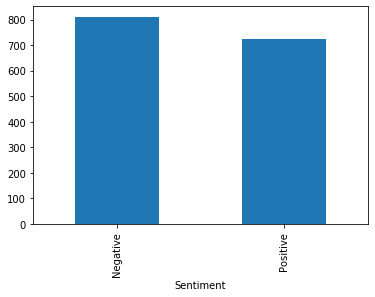

In [115]:
# How many fake and real articles?
print(df.groupby(['Sentiment'])['OriginalTweet'].count())
df.groupby(['Sentiment'])['OriginalTweet'].count().plot(kind="bar")
plt.show()

##### Label Encoding

In [116]:
sent={'Negative':0,'Positive':1}
def labelencode(x):
    return sent[x]
df['Sentiment']=df['Sentiment'].apply(labelencode)
df.head(10)


C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,OriginalTweet,Sentiment
0,couldnt find hand sanitizer fred meyer turned ...,1
1,panic buying hit newyork city anxious shopper ...,0
3,best quality couch unbelievably low price avai...,1
4,busy watching election return bracing covid19 ...,1
6,coronavirus covid19 people starting become fri...,0
7,alright yall hope melanin prevails case took p...,1
8,usual grocery shopping woolworth turn toilet p...,0
11,coronavirus exposure hole social safety net sa...,1
12,two important phone number nyers know doctor i...,0
13,fellow uni instructor covid19 f2f class cancel...,0


##### Train Test Split

In [117]:
x=df['OriginalTweet']
y=df['Sentiment']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)

##### Tfidf Vectorizer

In [118]:
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)
tfidf_train.shape,tfidf_test.shape

((1075, 5488), (461, 5488))

##### Model Fitting

In [120]:
lr=LogisticRegression(random_state=0)
lr.fit(tfidf_train,y_train)
yprediction1=lr.predict(tfidf_test)
print("Logistic Regression Accuracy Percentage: ",round(accuracy_score(yprediction1,y_test),4))

model_naive = naive_bayes.MultinomialNB()
model_naive.fit(tfidf_train, y_train)
yprediction2=model_naive.predict(tfidf_test)
print("Naive Bayes Accuracy Percentage: ",round(accuracy_score(yprediction2,y_test),4))

dt=DecisionTreeClassifier(random_state=0)
dt.fit(tfidf_train,y_train)
yprediction3=dt.predict(tfidf_test)
print("Decision Tree Accuracy Percentage: ",round(accuracy_score(yprediction3,y_test),4))

rf=RandomForestClassifier(n_estimators=50)
rf.fit(tfidf_train,y_train)
yprediction4=rf.predict(tfidf_test)
print("Random Forest Accuracy Percentage: ",round(accuracy_score(yprediction4,y_test),4))

svm=LinearSVC()
svm.fit(tfidf_train,y_train)
yprediction5=svm.predict(tfidf_test)
print("SVM Accuracy Percentage: ",round(accuracy_score(yprediction5,y_test),4))

Logistic Regression Accuracy Percentage:  0.6226
Naive Bayes Accuracy Percentage:  0.5944
Decision Tree Accuracy Percentage:  0.5748
Random Forest Accuracy Percentage:  0.603
SVM Accuracy Percentage:  0.6117
